In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import date

def pieChart(title,labels, values):
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
    patches, texts = plt.pie(values,colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title(title)
    # Set aspect ratio to be equal so that pie is drawn as a circle.
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    plt.clf()
    
def barchart(xVar , yVar , xName , yName , title): 
    plt.figure(figsize=(12,5))
    plt.grid(zorder=0)
    plt.bar(xVar , yVar,edgecolor='black' ,color='lightgreen', zorder= 3)
    plt.plot(yVar, color = 'red' , zorder = 4 )
    plt.xlabel(xName)
    plt.xticks(rotation=90)
    plt.ylabel(yName)
    plt.title(title , fontweight='bold')
    #set axis if needed
    #plt.ylim(0,1)    
    #draw line 
    #plt.axhline(y=0.0, color='r' , linestyle='-')
    plt.show()
    plt.clf()

In [2]:
kasus = pd.read_csv('./dataset/covid/cases.csv')
pasien = pd.read_csv('./dataset/covid/patient.csv')

In [3]:
kasus.tail(5)

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
25,27-Mar-20,1439.0,5775,153,1046,4729,0,913,11,46,9,87,18.11%,81.89%,8.32%,4.40%,10.63%
26,28-Mar-20,491.0,6266,109,1155,5111,0,994,13,59,15,102,18.43%,81.57%,8.83%,5.11%,22.20%
27,29-Mar-20,268.0,6534,130,1285,5249,0,1107,5,64,12,114,19.67%,80.33%,8.87%,4.98%,48.51%
28,30-Mar-20,129.0,6663,129,1414,5249,0,1217,11,75,8,122,21.22%,78.78%,8.63%,5.30%,100.00%
29,31-Mar-20,114.0,6777,114,1528,5249,0,1311,6,81,14,136,22.55%,77.45%,8.90%,5.30%,100.00%


In [4]:
pasien.describe()

,patient_id,age,contacted_with
count,893.000000,156.000000,27.000000
mean,447.000000,48.108974,30.555556
std,257.931192,16.627833,36.051601
min,1.000000,2.000000,1.000000
25%,224.000000,36.000000,1.000000
50%,447.000000,49.000000,1.000000
75%,670.000000,59.000000,74.000000
max,893.000000,86.000000,83.000000


In [5]:
pasien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 11 columns):
patient_id        893 non-null int64
gender            156 non-null object
age               156 non-null float64
nationality       156 non-null object
province          156 non-null object
current_state     166 non-null object
contacted_with    27 non-null float64
confirmed_date    893 non-null object
released_date     5 non-null object
deceased_date     4 non-null object
hospital          17 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ KB


In [6]:
pasien['current_state'].value_counts()

isolated    143
deceased     15
released      8
Name: current_state, dtype: int64

In [14]:
pasien.isna().values.any()

True

In [15]:
pasien[pasien.duplicated()]

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital


In [16]:
pasien.duplicated().value_counts()

False    893
dtype: int64

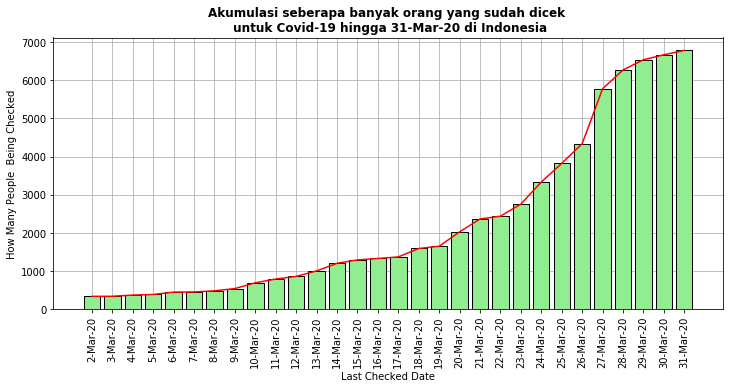

<Figure size 432x288 with 0 Axes>

In [7]:
##    JUMLAH YANG DIPERIKSA 10 HARI TERAKHIR 
##    HOW MANY PATIENTS BEING CHECKED LAST 10 TEN DAYS 
last_Data = kasus.tail(1)
last_Date = last_Data['date'].values[0] 

last_fiveDay = kasus.tail(10)
barchart(kasus.date , kasus.acc_tested , 'Last Checked Date', 'How Many People  Being Checked' , 
         'Akumulasi seberapa banyak orang yang sudah dicek \n untuk Covid-19 hingga ' + last_Date + ' di Indonesia') 

In [8]:
pasien['gender'] = pasien['gender'].replace(np.nan , 'undefined' , regex = True)
pasien['province'] = pasien['province'].replace(np.nan, 'undefined' , regex = True)
pasien.head(5)

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


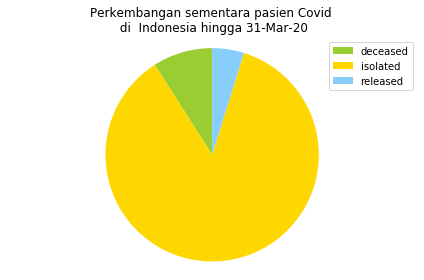

<Figure size 432x288 with 0 Axes>

In [9]:
patientgroupbycs= pasien[['current_state', 'patient_id']].groupby('current_state').count()
pieChart('Perkembangan sementara pasien Covid \n di  Indonesia hingga ' + last_Date,
        patientgroupbycs.index,
        patientgroupbycs.patient_id)

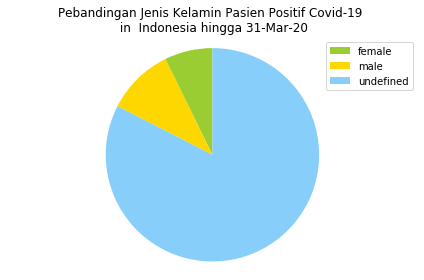

<Figure size 432x288 with 0 Axes>

In [12]:
patientgroupbygender= pasien[['gender', 'patient_id']].groupby('gender').count()
pieChart('Pebandingan Jenis Kelamin Pasien Positif Covid-19 \n in  Indonesia hingga ' + last_Date,
        patientgroupbygender.index,
        patientgroupbygender.patient_id)

In [22]:
pasien.columns

Index(['patient_id', 'gender', 'age', 'nationality', 'province',
       'current_state', 'contacted_with', 'confirmed_date', 'released_date',
       'deceased_date', 'hospital'],
      dtype='object')

In [17]:
pasien['province'].value_counts()

undefined           737
DKI Jakarta         124
Jawa Barat            9
Jawa Timur            7
Banten                6
Jawa Tengah           4
Kalimantan Barat      2
Sulawesi Utara        1
Bali                  1
Kepulauan Riau        1
DI Yogyakarta         1
Name: province, dtype: int64

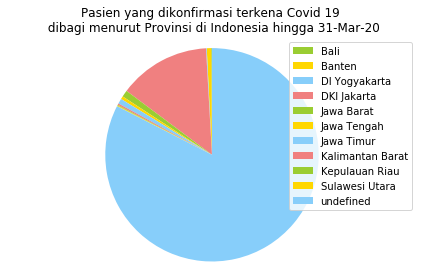

<Figure size 432x288 with 0 Axes>

In [13]:
patientgroupbycity = pasien[['province', 'patient_id']].groupby('province').count()
pieChart('Pasien yang dikonfirmasi terkena Covid 19 \n dibagi menurut Provinsi di Indonesia hingga ' + last_Date,
        patientgroupbycity.index,
        patientgroupbycity.patient_id)

Kasus Covid 19 di beberapa Provinsi


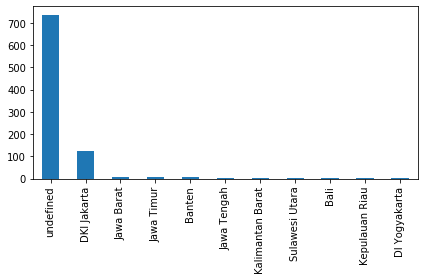

In [23]:
print('Kasus Covid 19 di beberapa Provinsi')
pasien['province'].value_counts().plot.bar()
plt.tight_layout()
plt.show()